In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from sp_rest_client import *
from sp_scrapper_cache import *
from sp_scrapper import *

In [12]:
client = SpRestClient('https://sprawdz.biz/api/')

scrapper_cache = SpScrapperCache(client)
scrapper = SpScrapper(scrapper_cache)

scrapper_cache.init_couchdb()

def person_print(i, person):
    print('%s. ' % i + person['name'] + ', ' + person['birthYear'] + ', ' + person['id'])
    
def person_search(person_query):
    search = client.search(person_query)
    search_people = [p for p in search if p['type'] == 'person']
    for i in range(len(search_people)):
        person_print(i, search_people[i])
    return search_people

### Example 1 - expanding neighbourhood of a person

In [13]:
# Please fill in the fields below
person_query = 'Jerzy Mazgaj'

In [14]:
print('Choose number of a person:')
search_people = person_search(person_query)

Choose number of a person:
0. Jerzy Mazgaj, 1960, 1620088
1. Jerzy Mazgaj, 1947, 228001
2. Jerzy Mazgaj, 1960, 1623922
3. Jerzy Mazgaj, 1959, 33987
4. Grzegorz Mazgaj, 1961, 597490


In [15]:
person_no = 1

Exploring distance 0.
Jerzy Mazgaj, 1947, 228001
-AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
Exploring distance 1.
--Aleksander Rajski, 1968, 227999
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
--Katarzyna Kowalska, 1982, 228000
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
--Mirosław Kaszuba, 1973, 228002
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
--Andrzej Górowski, 1966, 228003
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
--Renart Flądro, 1966, 561371
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
--Grzegorz Hochołowski, 1976, 561372
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
--Grzegorz Wajda, 1974, 561374
---AEROKLUB ZIEMI TARNOWSKIEJ, 0000131635, 131635
Populating the interactive namespace from numpy and matplotlib


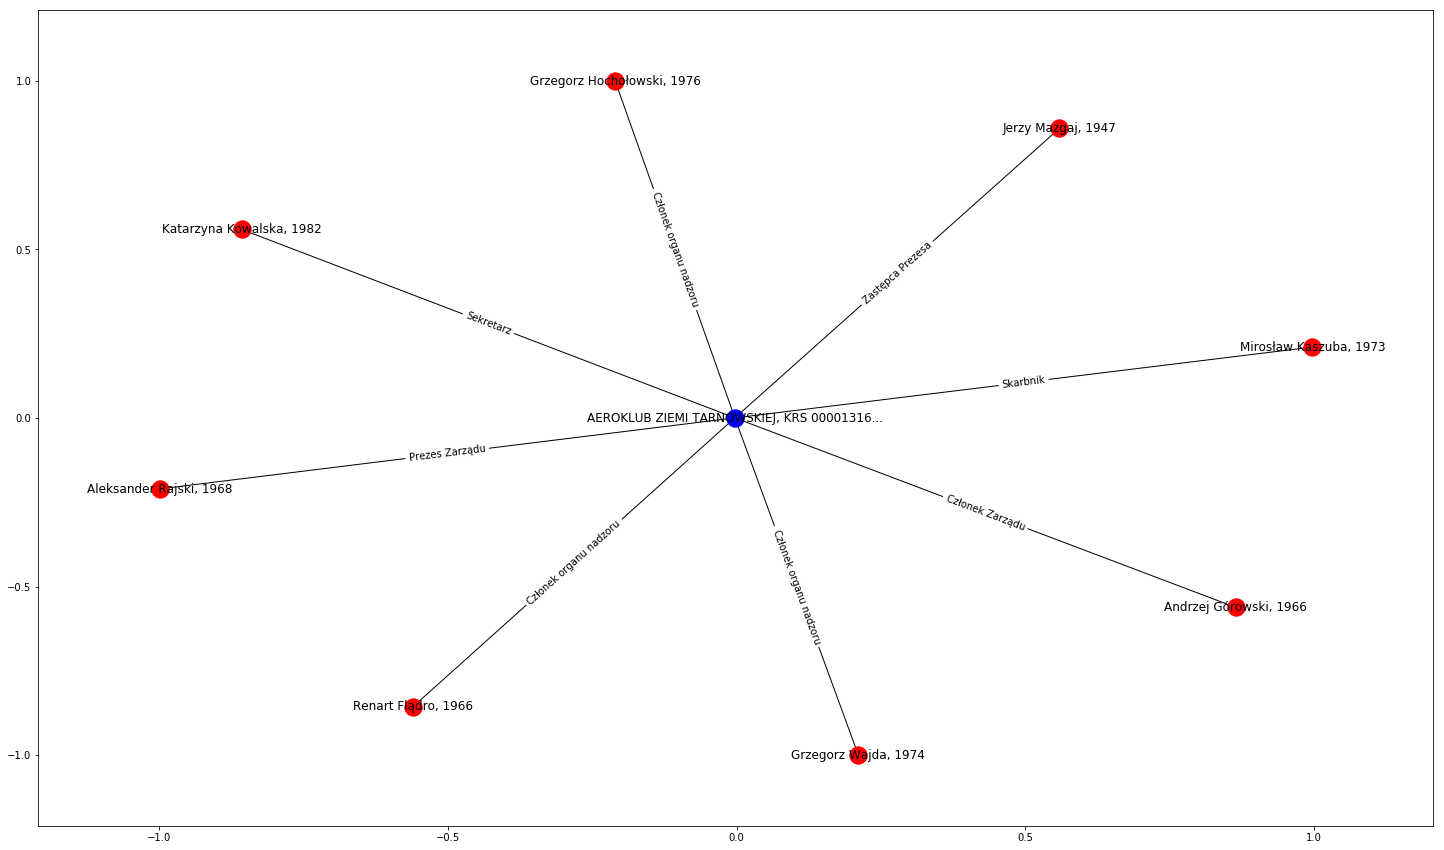

In [16]:
graph = scrapper.expand_person(search_people[person_no], 2)

%pylab inline
figsize(25, 15)
graph.draw()

### Example 2 - finding shortest path between people

In [21]:
# Please fill in the fields below
person_1_query = 'Jerzy Mazgaj'
person_2_query = 'Tomasz Zaboklicki'

In [22]:
print('Choose number of a person 1:')
search_1_people = person_search(person_1_query)

print('')
print('Choose number of a person 1:')
search_2_people = person_search(person_2_query)

Choose number of a person 1:
0. Jerzy Mazgaj, 1960, 1620088
1. Jerzy Mazgaj, 1947, 228001
2. Jerzy Mazgaj, 1960, 1623922
3. Jerzy Mazgaj, 1959, 33987
4. Grzegorz Mazgaj, 1961, 597490

Choose number of a person 1:
0. Tomasz Zaboklicki, 1958, 72237


In [23]:
# Please fill in the fields below
person_1_no = 3
person_2_no = 0

In [25]:
graph = scrapper.find_path(search_1_people[person_1_no], search_2_people[person_2_no], 2)

Jerzy Mazgaj, 1959, 33987
-"EVERGOOD" SP. Z O.O., 0000412291, 412291
-AM2 SP. Z O.O., 0000324980, 324980
-PREMIUM CIGARS SP. Z O.O., 0000243505, 243505
-CLIFFSIDEBROKERS S.A., 0000548390, 548390
-W.KRUK S.A., 0000500269, 500269
-DCG S.A., 0000285675, 285675
-KRAKCHEMIA S.A., 0000217348, 217348
-VISTULA GROUP S.A., 0000047082, 47082
Tomasz Zaboklicki, 1958, 72237
-"PRACODAWCY POMORZA I KUJAW" ZWIĄZEK PRACODAWCÓW, 0000109572, 109572
-PESA RENTAL SP. Z O.O., 0000438320, 438320
-PESA HOLDING SP. Z O.O., 0000420982, 420982
-BYDGOSKI KLUB OYAMA KARATE PAŁAC, 0000120516, 120516
-PRACODAWCY RZECZYPOSPOLITEJ POLSKIEJ, 0000047928, 47928
-POJAZDY SZYNOWE PESA BYDGOSZCZ S.A., 0000036552, 36552
-ZAKŁAD MECHANICZNY "SKRAW-MECH" SP. Z O.O., 0000063484, 63484
Exploring distance 0.
--Barbara Mazgaj, 1959, 1232638
---DCG S.A., 0000285675, 285675
---W.KRUK S.A., 0000500269, 500269
---"EVERGOOD" SP. Z O.O., 0000412291, 412291
---KRAKCHEMIA S.A., 0000217348, 217348
--Maciej Wojciechowicz, 1966, 1444850
---

Populating the interactive namespace from numpy and matplotlib


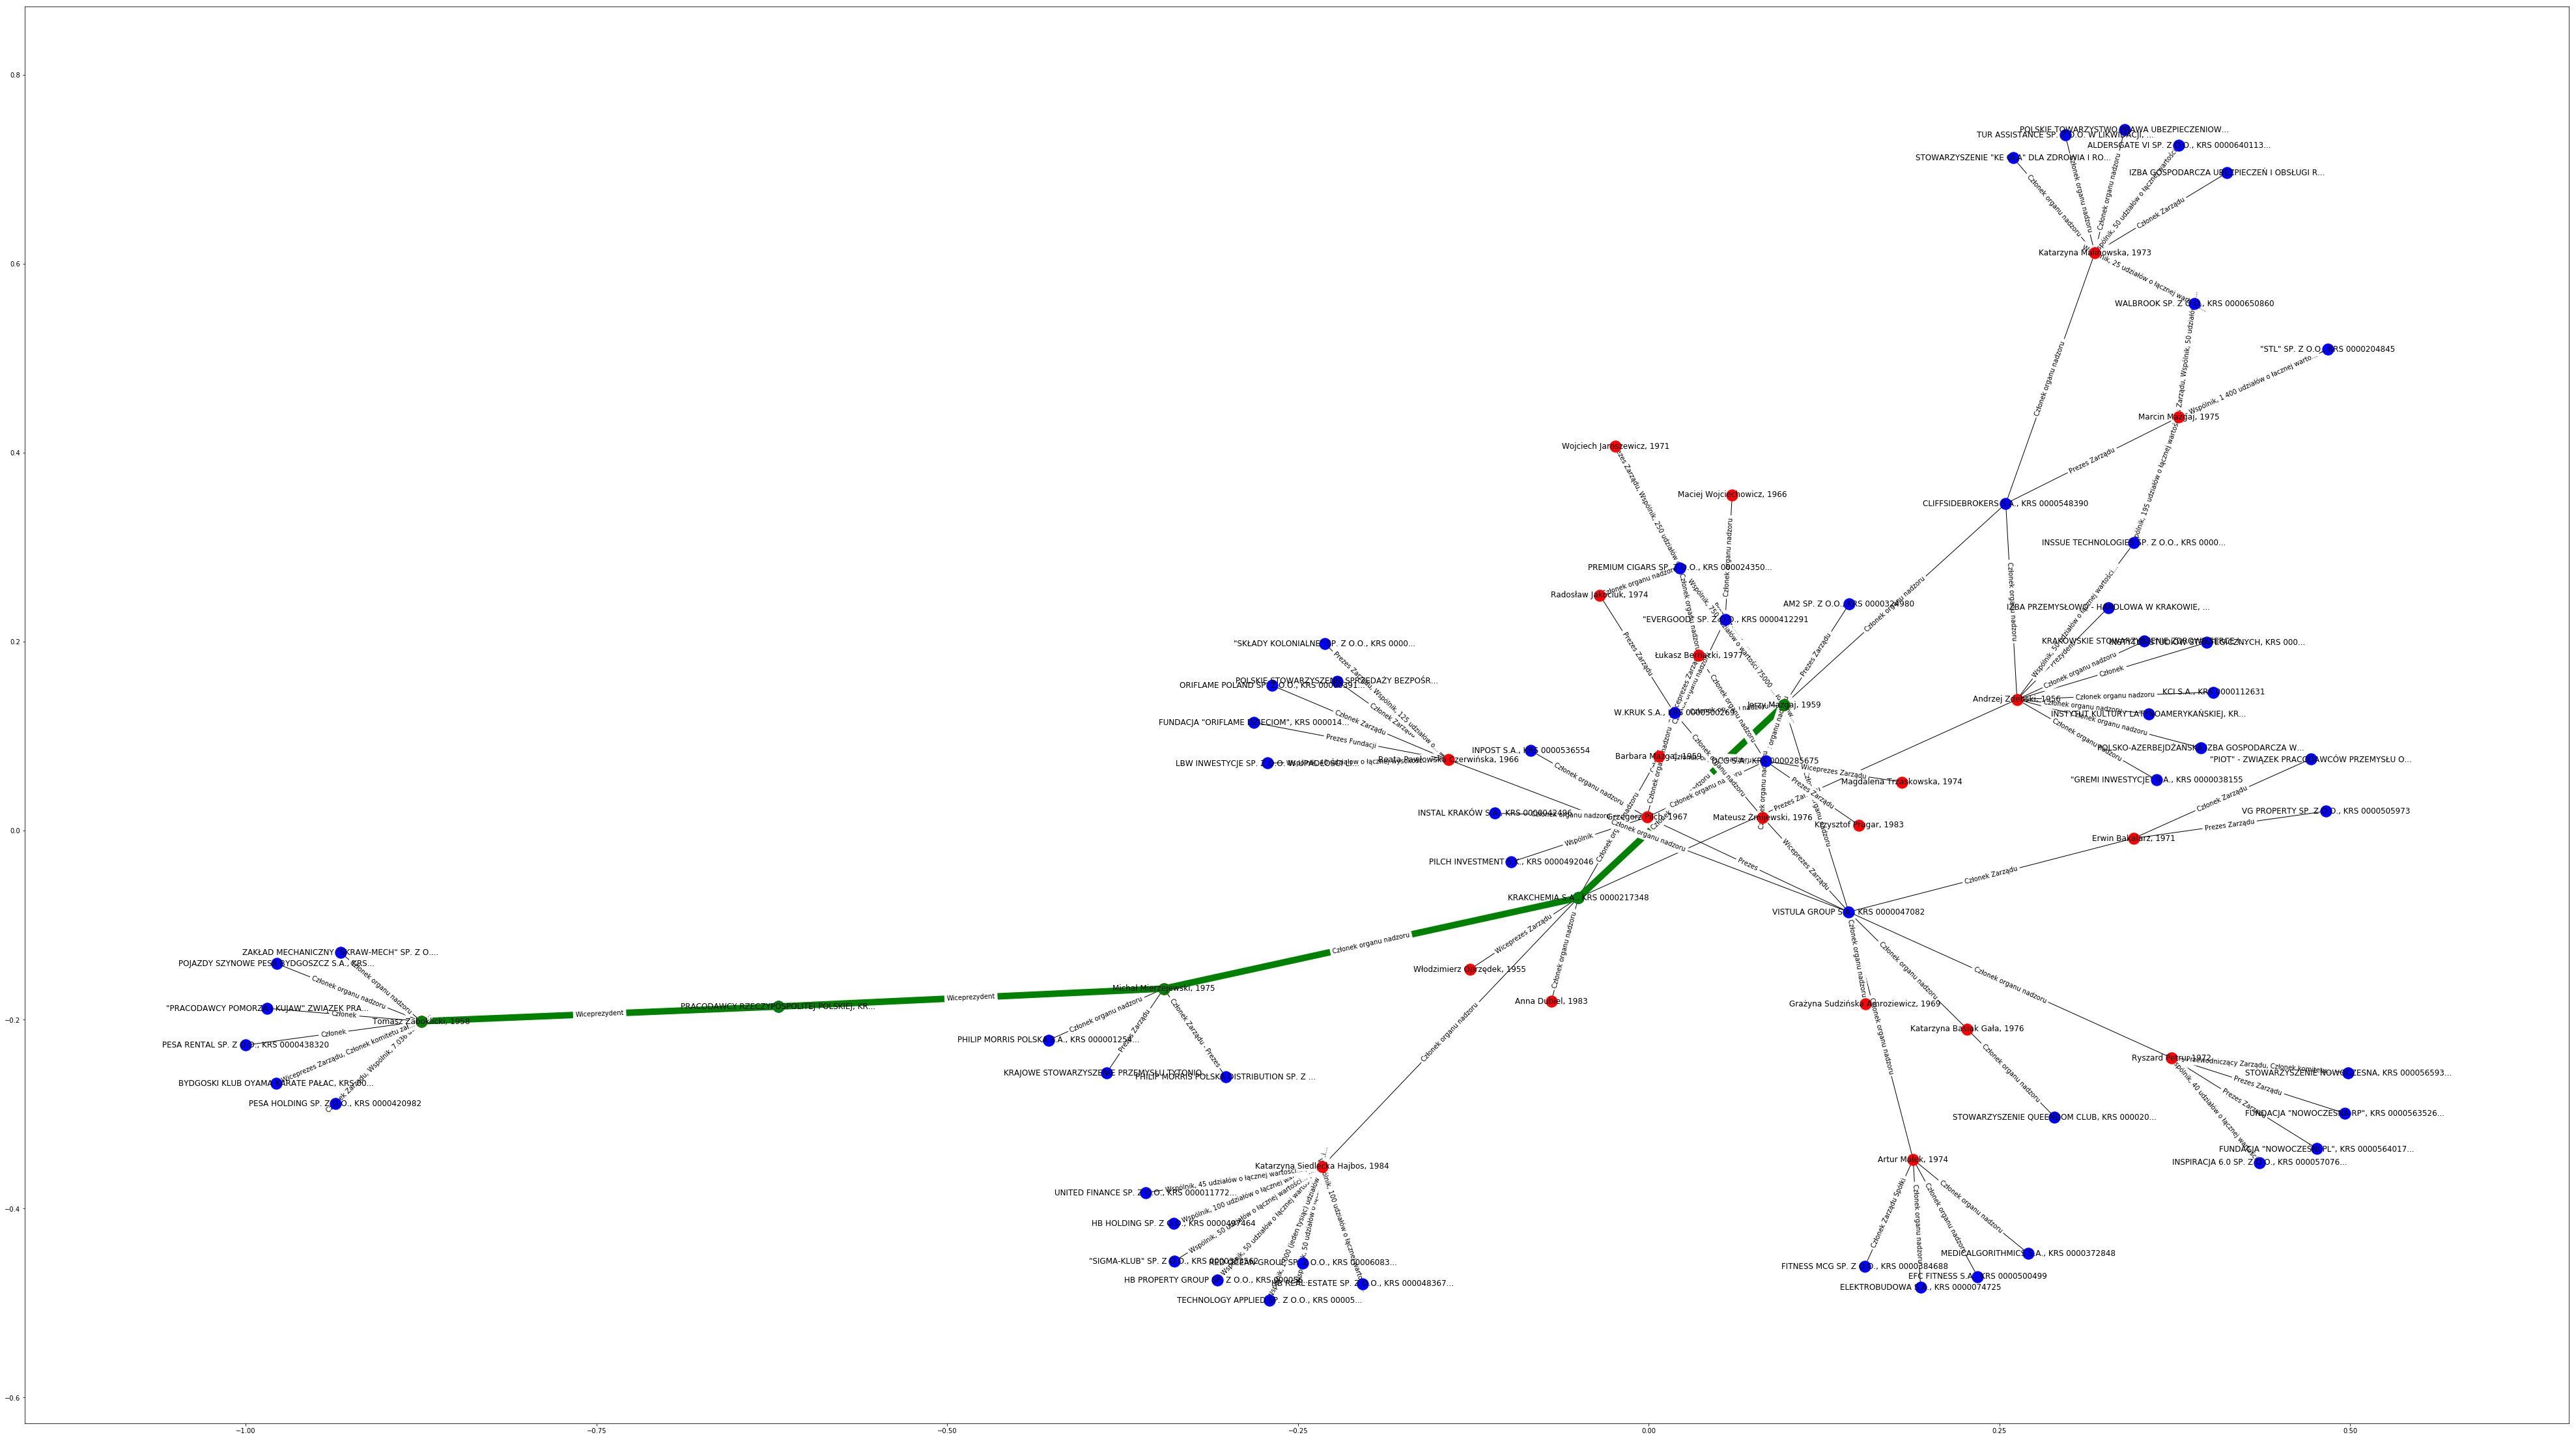

In [29]:
%pylab inline
figsize(70, 40)
graph.draw()